# Scripts que analisa o comportamento temporal das amostras com o indice NDFIa

## load packages and initialize variavel 

In [1]:
import glob
import os 
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [3]:
# !ls

In [11]:
pathbase = os.getcwd()
path_Foldercsv = pathbase + '/roisSoils'
allfileCSVs = glob.glob(path_Foldercsv + '/*')
print(f"we have {len(list(allfileCSVs))} files CSV")


we have 7906 files CSV


In [12]:
print("! reading ", allfileCSVs[0])
dftmp = pd.read_csv(allfileCSVs[0])
print(dftmp.shape)


! reading  /run/media/superuser/Almacen/mapbiomas/dev_mapping_soil_colection_beta/src/feature_analysis/roisSoils/rois_harm_CERRADO_1991_219_70_2019.csv
(614, 16)


In [13]:
dftmp.head()

,system:index,LT05_219070_19910124,LT05_219070_19910225,LT05_219070_19910313,LT05_219070_19910414,LT05_219070_19910430,LT05_219070_19910516,LT05_219070_19910601,LT05_219070_19910617,LT05_219070_19910703,LT05_219070_19910719,LT05_219070_19910804,LT05_219070_19910905,LT05_219070_19911007,class,.geo
0,1_00000000000000000257_0,5329,4672,4232,3586,3487,3532,3666,3812,3899,3884,3767,3419,3412,1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,1_0000000000000000007d_0,11118,11960,11969,11146,10400,9525,8607,7726,6947,6318,5870,5555,6008,1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,1_000000000000000000b7_0,13169,13007,12623,11529,10882,10181,9425,8629,7829,7089,6497,6108,7103,1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,1_000000000000000000a1_0,14838,15698,15166,12855,11542,10404,9552,8996,8657,8410,8138,7361,6829,1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,1_00000000000000000065_0,6773,7078,7173,7075,6845,6507,6100,5682,5313,5047,4915,5059,5535,1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [14]:
dict_paths = {}
for cc, npath in enumerate(allfileCSVs):
    nameFile = npath.replace(path_Foldercsv + '/', "")
    print(f" # {cc} >> processing {nameFile} ")
    nyear = nameFile.split("_")[3]
    if 'harm' in nameFile:
        mkey = 'harm_' + nameFile[23:-4]
    else:
        mkey = 'index_' + nameFile[24:-4]
    lstKey = list(dict_paths.keys())
    if mkey in lstKey:
        lstYear = dict_paths[mkey]
        lstYear.append(nameFile)
        dict_paths[mkey] = lstYear
    else:
        dict_paths[mkey] = [nameFile]
        

 # 0 >> processing rois_harm_CERRADO_1991_219_70_2019.csv 
 # 1 >> processing rois_harm_CERRADO_2002_219_73_2010.csv 
 # 2 >> processing rois_harm_CERRADO_1997_219_72_2013.csv 
 # 3 >> processing rois_Index_CERRADO_2001_219_70_2000.csv 
 # 4 >> processing rois_harm_CERRADO_1998_219_72_2009.csv 
 # 5 >> processing rois_Index_CERRADO_2013_219_70_1996.csv 
 # 6 >> processing rois_Index_CERRADO_1987_219_73_2008.csv 
 # 7 >> processing rois_Index_CERRADO_2014_219_70_1992.csv 
 # 8 >> processing rois_harm_CERRADO_1986_219_72_2001.csv 
 # 9 >> processing rois_harm_CERRADO_1986_219_71_2004.csv 
 # 10 >> processing rois_Index_CERRADO_2005_219_73_2010.csv 
 # 11 >> processing rois_harm_CERRADO_2004_219_72_2008.csv 
 # 12 >> processing rois_harm_CERRADO_2002_219_70_2005.csv 
 # 13 >> processing rois_Index_CERRADO_1999_219_70_2008.csv 
 # 14 >> processing rois_Index_CERRADO_1991_219_71_1985.csv 
 # 15 >> processing rois_harm_CERRADO_1991_219_71_1998.csv 
 # 16 >> processing rois_Index_CERRADO_1991

In [15]:
len(list(dict_paths.keys()))

296

In [16]:
for nkey, lstVal in dict_paths.items():
    print(f" {nkey} >> {len(lstVal)}")

 harm_219_70_2019 >> 38
 harm_219_73_2010 >> 25
 harm_219_72_2013 >> 38
 index_219_70_2000 >> 38
 harm_219_72_2009 >> 38
 index_219_70_1996 >> 38
 index_219_73_2008 >> 25
 index_219_70_1992 >> 38
 harm_219_72_2001 >> 38
 harm_219_71_2004 >> 7
 index_219_73_2010 >> 25
 harm_219_72_2008 >> 38
 harm_219_70_2005 >> 38
 index_219_70_2008 >> 38
 index_219_71_1985 >> 7
 harm_219_71_1998 >> 7
 index_219_73_2006 >> 25
 harm_219_72_1995 >> 38
 harm_219_70_1990 >> 38
 harm_219_73_2013 >> 25
 harm_219_70_2012 >> 38
 index_219_70_2006 >> 38
 index_219_72_1998 >> 36
 index_219_70_2011 >> 38
 index_219_72_1993 >> 36
 harm_219_72_1993 >> 38
 index_219_73_1987 >> 25
 index_219_70_1990 >> 36
 index_219_73_2005 >> 25
 index_219_73_1999 >> 25
 harm_219_73_2016 >> 25
 index_219_73_1996 >> 25
 index_219_71_2007 >> 6
 harm_219_72_1985 >> 38
 harm_219_70_2001 >> 38
 index_219_73_1998 >> 25
 harm_219_72_1986 >> 38
 harm_219_73_2007 >> 25
 harm_219_72_2016 >> 38
 harm_219_72_2012 >> 38
 index_219_71_2014 >> 6
 

In [69]:
def make_df_from_csv_cena(listNameCSVs):
    lstDF = []
    indexCSV = False
    nPathRow = None
    mclass = None
    for cc, namefile in enumerate(listNameCSVs):
        # print('namefile=>  ', namefile)
        if "Index" in namefile:
            indexCSV = True
            # rois_Index_CERRADO_2014_219_72_2013
            nPathRow = namefile.split("_")[4] + '0' + namefile.split("_")[-2]
        npath = path_Foldercsv + '/' + namefile
        dftmp = pd.read_csv(npath)
       
        if cc + 1 == len(lstNameCSVs):
            dftmp = dftmp.drop(['system:index', '.geo'], axis= 1)
        else:
            dftmp = dftmp.drop(['system:index', '.geo', 'class'], axis= 1)
        # print(dftmp.columns)
        myColumns = [kk for kk in dftmp.columns if len(kk.split("_")) < 4]
        dftmp = dftmp[myColumns]
        # print(dftmp.columns)
        # print(dftmp.head(2))
        # print(dftmp.shape)
        lstDF.append(dftmp)
    print(f" we loaded {len(lstDF)} dataframes ")

    result = pd.concat(lstDF, axis=1)
    print(f" size fo csvs joined {result.shape}")

    result['codigo'] = result.index
    def set_codigo_string(row):
        row['str_codigo'] = 'pto_' + str(int(row['codigo']))
        return row
    
    result = result.apply(set_codigo_string, axis= 1)
    myColumns = list(result.columns)
    print(f" número de colunas {len(myColumns)} ")
    # set código como index e remover as colunas de codigos 
    result = result.set_index('str_codigo')
    if not mclass:        
         mclass = result['class'].unique()  
    
    print(f"número de classes {mclass}")
    
    myColumns.remove('codigo')
    myColumns.remove('str_codigo')
    myColumns.remove('class')
    # get the columns especifique 
    result = result[myColumns]
    dfMod = result.T
    print(dfMod.head())
    # dfMod = dfMod.dropna(axis='columns')
    # criar uma coluna com os nomes das bandas em Landsat 
    dfMod['nameLandsat'] = list(dfMod.index.tolist())
    dfMod = dfMod[:-2]
    # criar as colunas de datas 
    print(dfMod.head())
    def get_date_path_row(row):
        nameL = row['nameLandsat']
        print(nameL)
        if indexCSV:
            row['path_row'] = nPathRow            
            mdate = nameL.split("_")[-1]
            print("mdate == ", mdate , " <> from ", nameL)
            row['date'] = datetime.datetime(int(mdate[:4]), int(mdate[4:]), 1)
        else:
            row['path_row'] = nameL.split("_")[1]
            mdate = nameL.split("_")[-1]
            # print("mdate == ", mdate , " <> from ", nameL)
            row['date'] = datetime.datetime(int(mdate[:4]), int(mdate[4:6]), int(mdate[6:]))
        return row
    dfMod = dfMod.apply(get_date_path_row, axis= 1)    
    dfMod = dfMod.sort_values('date')
    
    return dfMod, mclass


In [77]:

lstNameCSVs = dict_paths['harm_219_70_2011']
# lstNameCSVs = dict_paths['harm_219_70_2019']
# lstNameCSVs = dict_paths['harm_219_72_2013']
print(lstNameCSVs)

['rois_harm_CERRADO_1987_219_70_2011.csv', 'rois_harm_CERRADO_2008_219_70_2011.csv', 'rois_harm_CERRADO_2011_219_70_2011.csv', 'rois_harm_CERRADO_2017_219_70_2011.csv', 'rois_harm_CERRADO_1996_219_70_2011.csv', 'rois_harm_CERRADO_2020_219_70_2011.csv', 'rois_harm_CERRADO_2021_219_70_2011.csv', 'rois_harm_CERRADO_2016_219_70_2011.csv', 'rois_harm_CERRADO_2012_219_70_2011.csv', 'rois_harm_CERRADO_1990_219_70_2011.csv', 'rois_harm_CERRADO_2001_219_70_2011.csv', 'rois_harm_CERRADO_2018_219_70_2011.csv', 'rois_harm_CERRADO_2000_219_70_2011.csv', 'rois_harm_CERRADO_2004_219_70_2011.csv', 'rois_harm_CERRADO_1991_219_70_2011.csv', 'rois_harm_CERRADO_1985_219_70_2011.csv', 'rois_harm_CERRADO_1994_219_70_2011.csv', 'rois_harm_CERRADO_2006_219_70_2011.csv', 'rois_harm_CERRADO_1998_219_70_2011.csv', 'rois_harm_CERRADO_2005_219_70_2011.csv', 'rois_harm_CERRADO_2013_219_70_2011.csv', 'rois_harm_CERRADO_2002_219_70_2011.csv', 'rois_harm_CERRADO_2010_219_70_2011.csv', 'rois_harm_CERRADO_2014_219_70_20

In [78]:
dfharm, classROI = make_df_from_csv_cena(lstNameCSVs)

 we loaded 38 dataframes 
 size fo csvs joined (588, 675)
 número de colunas 677 
número de classes [1 2 0]
str_codigo            pto_0  pto_1  pto_2  pto_3  pto_4  pto_5  pto_6  pto_7  \
LT05_219070_19870113   5844   9868   6070   9006  11352  10026   9046   7605   
LT05_219070_19870129   5938  10085   6184   9094  11528  10307   9238   7654   
LT05_219070_19870318   5891   9262   5988   9262  10854  10390   9150   7661   
LT05_219070_19870419   5529   8492   5544   9704  10098   9800   8764   7629   
LT05_219070_19870505   5229   8239   5292   9943   9730   9438   8524   7570   

str_codigo            pto_8  pto_9  ...  pto_578  pto_579  pto_580  pto_581  \
LT05_219070_19870113  15911   6405  ...    14215     9670     9205     7613   
LT05_219070_19870129  16152   6614  ...    14384     9544     9260     7866   
LT05_219070_19870318  14381   7170  ...    13366     8043     8666     8264   
LT05_219070_19870419  11979   7236  ...    13543     7339     7949     8161   
LT05_219070_1987

In [79]:
dfharm.head()

str_codigo,pto_0,pto_1,pto_2,pto_3,pto_4,pto_5,pto_6,pto_7,pto_8,pto_9,...,pto_581,pto_582,pto_583,pto_584,pto_585,pto_586,pto_587,nameLandsat,path_row,date
LT05_219070_19850107,5799,9716,6010,8950,11227,9914,8952,7576,15738,6344,...,7524,11493,8075,10203,5605,4335,9769,LT05_219070_19850107,219070,1985-01-07
LT05_219070_19850208,5970,10057,6208,9113,11505,10436,9296,7665,16077,6762,...,8011,10933,8141,10122,5536,4804,10673,LT05_219070_19850208,219070,1985-02-08
LT05_219070_19850328,5807,8979,5858,9379,10605,10236,9040,7657,13622,7221,...,8255,9809,7913,9207,5230,5367,10682,LT05_219070_19850328,219070,1985-03-28
LT05_219070_19850531,4595,7923,4890,10077,9058,8933,8065,7346,9555,7124,...,7924,8768,8037,8217,5563,5459,9465,LT05_219070_19850531,219070,1985-05-31
LT05_219070_19850616,4180,7678,4676,9882,8562,8742,7748,7125,9159,7112,...,7877,8167,8086,7793,5597,5385,9101,LT05_219070_19850616,219070,1985-06-16


In [80]:
dfharm.tail()

str_codigo,pto_0,pto_1,pto_2,pto_3,pto_4,pto_5,pto_6,pto_7,pto_8,pto_9,...,pto_581,pto_582,pto_583,pto_584,pto_585,pto_586,pto_587,nameLandsat,path_row,date
LC08_219070_20220910,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,LC08_219070_20220910,219070,2022-09-10
LC08_219070_20220926,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,LC08_219070_20220926,219070,2022-09-26
LC08_219070_20221012,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,LC08_219070_20221012,219070,2022-10-12
LC08_219070_20221028,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,LC08_219070_20221028,219070,2022-10-28
LC08_219070_20221113,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,LC08_219070_20221113,219070,2022-11-13


In [81]:
classROI

array([1, 2, 0])

In [82]:
lstNameInCSVs = dict_paths['index_219_70_2011']
# lstNameInCSVs = dict_paths['index_219_70_2019']
# lstNameInCSVs = dict_paths['index_219_72_2013']
print(f"load {len(lstNameInCSVs)} file CSVs de index ") 
print(lstNameInCSVs[:2])

load 38 file CSVs de index 
['rois_Index_CERRADO_2013_219_70_2011.csv', 'rois_Index_CERRADO_1995_219_70_2011.csv']


In [83]:
dfind, classROI = make_df_from_csv_cena(lstNameInCSVs)

 we loaded 38 dataframes 
 size fo csvs joined (582, 358)
 número de colunas 360 
número de classes [ 1.  2.  0. nan]
str_codigo    pto_0    pto_1    pto_2   pto_3    pto_4   pto_5    pto_6  \
bnd_201304  10289.0  17752.0  12551.0  6015.0  17596.0  7324.0  10679.0   
bnd_201305  10741.0  15956.0  10950.0  7528.0  14574.0  7086.0   8218.0   
bnd_201306   9354.0  13614.0  10625.0  6407.0  11185.0  6961.0   6856.0   
bnd_201307   8620.0  10103.0  10022.0  5441.0   9799.0  6412.0   6013.0   
bnd_201308   9208.0  11587.0  11019.0  6397.0  10941.0  6218.0   6118.0   

str_codigo    pto_7    pto_8    pto_9  ...  pto_572  pto_573  pto_574  \
bnd_201304  12349.0  13568.0  13923.0  ...      NaN      NaN      NaN   
bnd_201305   9935.0  12395.0  13057.0  ...      NaN      NaN      NaN   
bnd_201306   8769.0  10385.0  13225.0  ...      NaN      NaN      NaN   
bnd_201307   8945.0   9662.0  11935.0  ...      NaN      NaN      NaN   
bnd_201308   9049.0   9785.0  10858.0  ...      NaN      NaN      

In [84]:
classROI

array([ 1.,  2.,  0., nan])

In [87]:
def plot_time_Series(dftmpHarm, dftmpInd, nameCol, mycolor= '#32B166'):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dftmpHarm['date'], y=dftmpHarm[nameCol], marker=dict(color= mycolor), name = 'harmonic'))
    fig.add_trace(go.Scatter(x=dftmpInd['date'], y=dftmpInd[nameCol], marker=dict(color= '#583e03'), name = 'NDFIa'))
    fig.update_layout(
        height = 500,
        xaxis=dict(
            rangeselector=dict(
                 buttons=list([
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=365,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=1825,
                         label="5y",
                         step="year",
                         stepmode="backward"),
                    dict(count=3650,
                         label="10y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                    ])
                   ),
            rangeslider=dict(
                visible=True
           ),
            title='Data time'
        ),
        yaxis=dict(
            title='sum total'
        ),
        xaxis_rangeselector_font_color= 'black',
        xaxis_rangeselector_activecolor= 'gray',
        xaxis_rangeselector_bgcolor= '#32B166',
        template= 'ggplot2'
    )
    fig.update_layout(xaxis_range=[datetime.datetime(1985, 1, 1, 0, 0), datetime.datetime(2024, 12, 20, 0, 0)])
    fig.show()


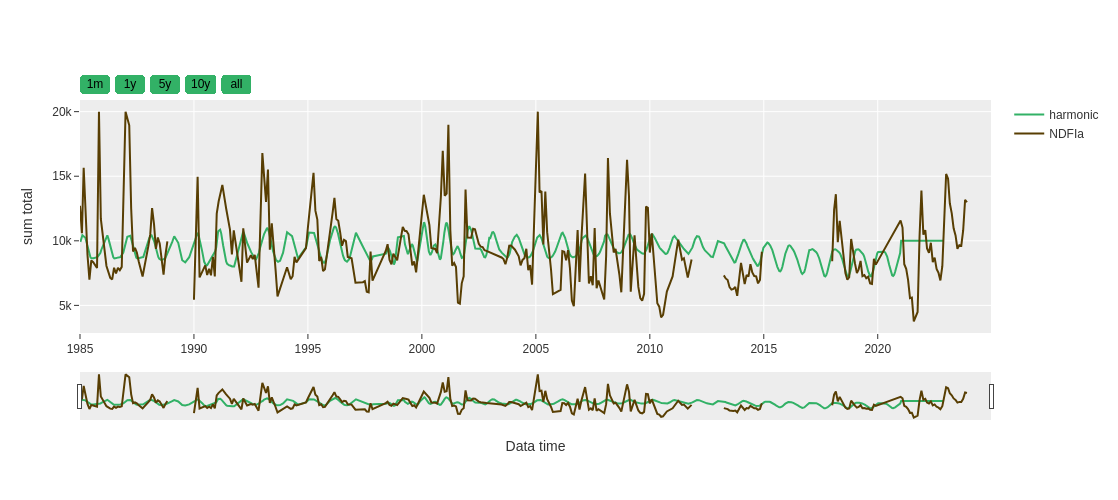

In [89]:
numbAl = random.randint(0, 800)
plot_time_Series(dfharm, dfind,f'pto_{5}')